# 我们输入的x是有多种维度的特征
即是一个多维矩阵 来预测y的值

之前的数据集
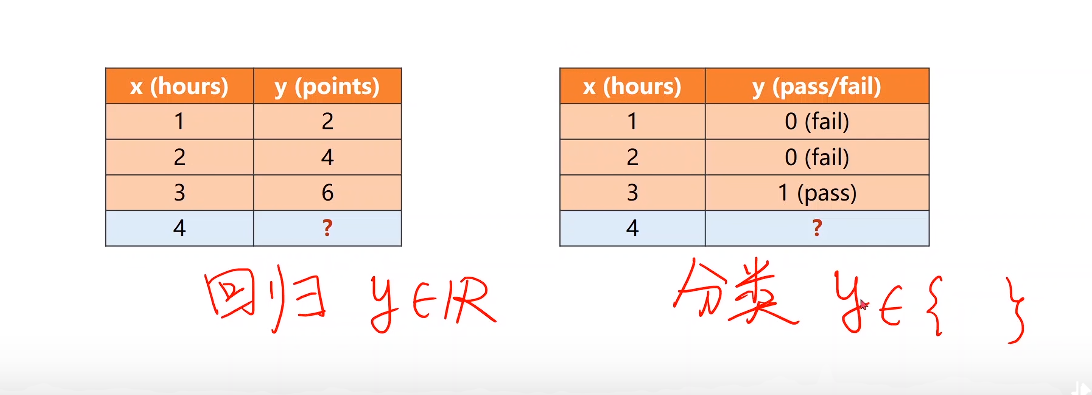

例如一个糖尿病的数据集（这是一个分类任务的数据集）

每一行是一个样本/（record 记录）

每一列是一个特征/（字段）

一个部分作为输入x 一个部分作为输入y
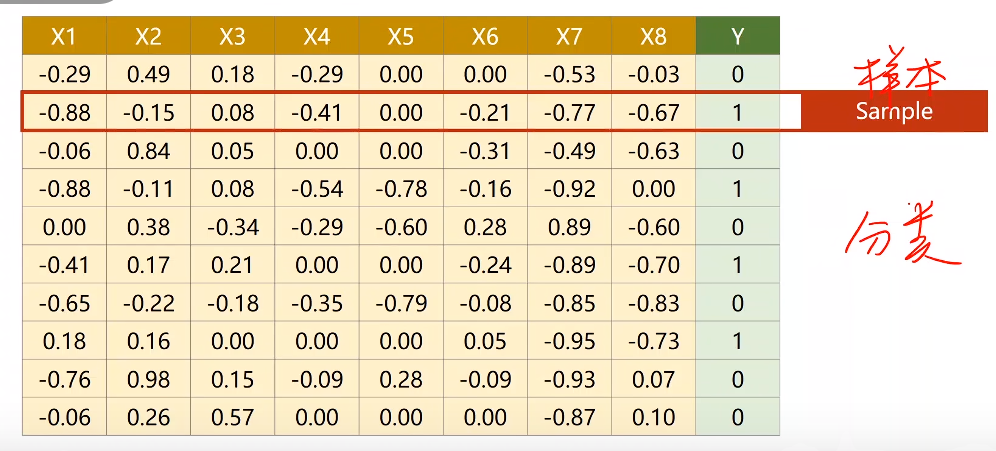
x从一维变成了8维 模型也有了相应的变化
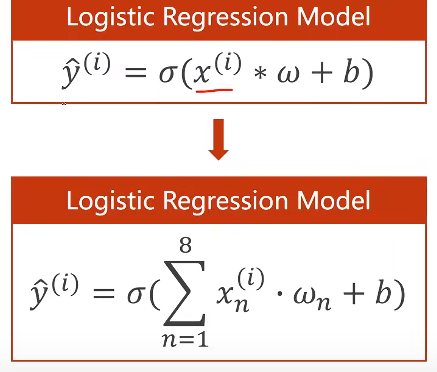
每一个xn都要乘以wn（有n维的x就有n维的权重） 以矩阵相乘
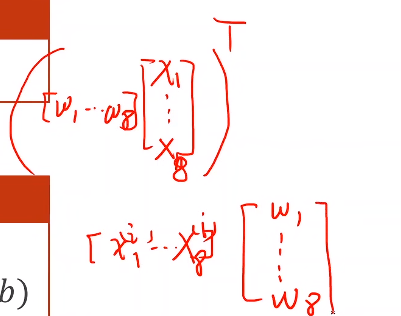
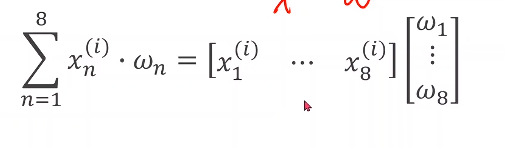
再做成逻辑斯蒂分类模型就是 在送到饱和函数中
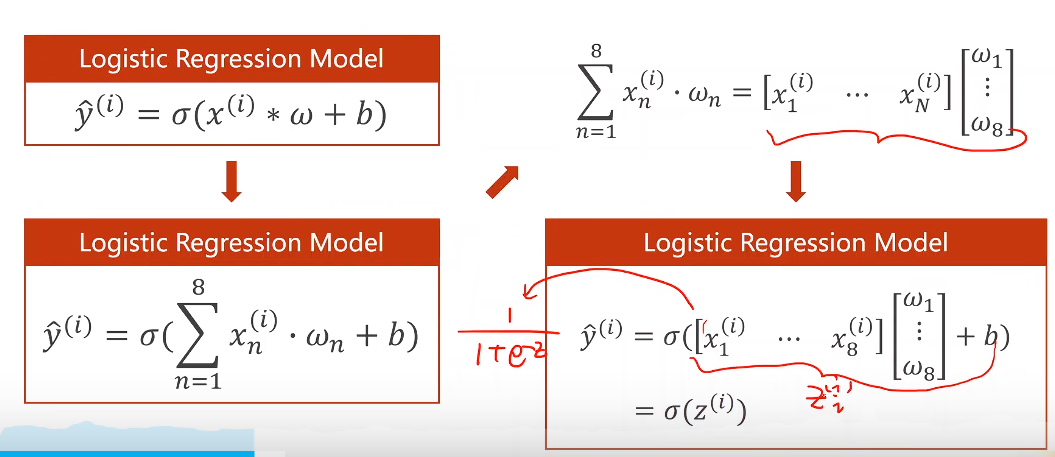

mini-batch的情况 变成矩阵运算即向量化的计算
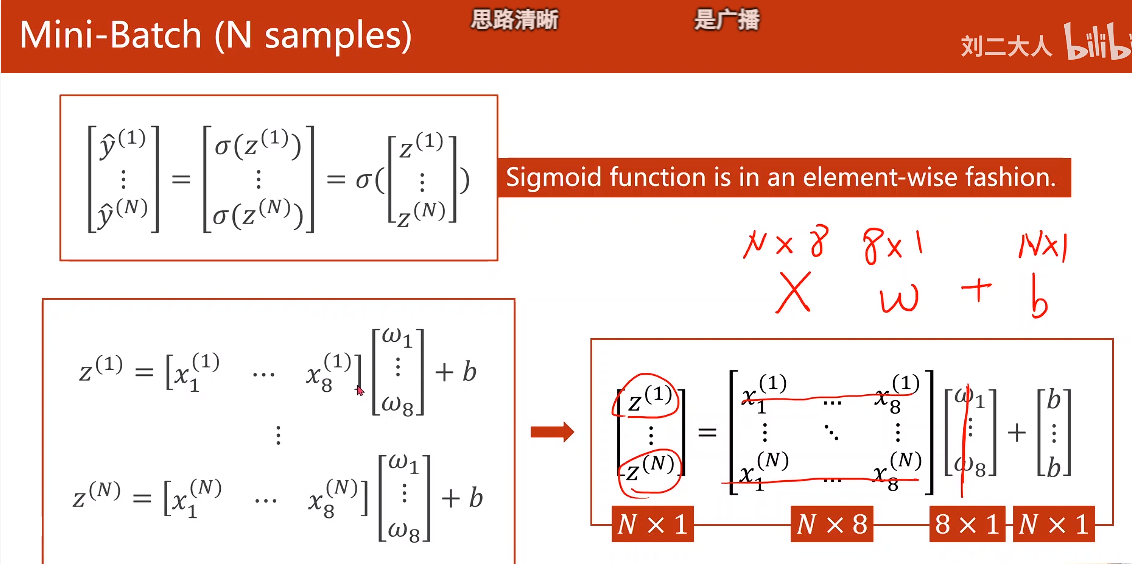

1、乘的权重(w)都一样，加的偏置(b)也一样。b变成矩阵时使用广播机制。神经网络的参数w和b是网络需要学习的，其他是已知的。

2、学习能力越强，有可能会把输入样本中噪声的规律也学到。我们要学习数据本身真实数据的规律，学习能力要有泛化能力。取多少层，没层取多少  多用超参数搜索的方式来进行查找

3、该神经网络共3层；第一层是8维到6维的非线性空间变换，第二层是6维到4维的非线性空间变换，第三层是4维到1维的非线性空间变换。
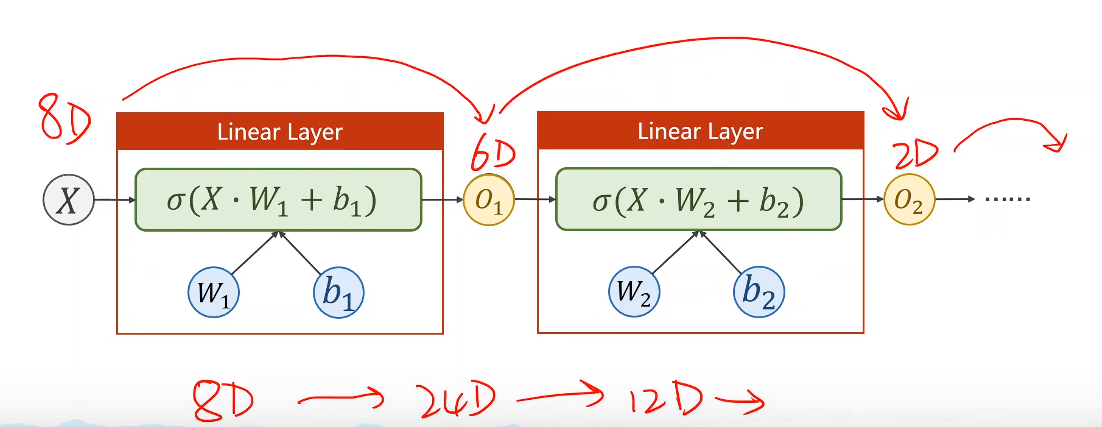




4、本算法中torch.nn.Sigmoid() # 将其看作是网络的一层，而不是简单的函数使用

例：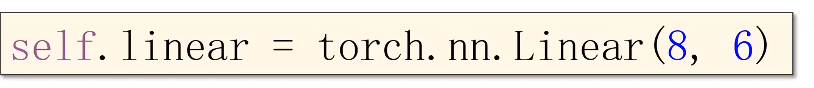通过linear线性变化从8维降到6维

用分类模型进行糖尿病数据的模型建立与数据预测
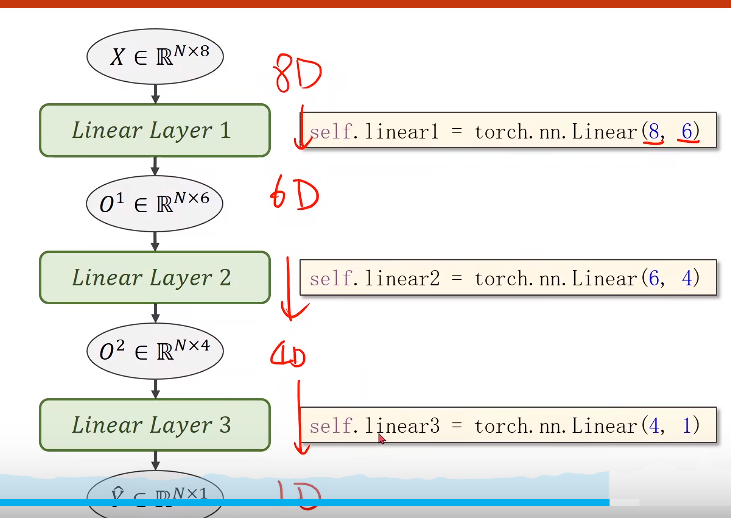

1.准备数据集

2.设计模型

3.构建损失函数和优化器

4.训练

torch.nn.sigoid()函数是一个模块
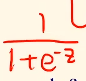

In [1]:
#数据的读取
import numpy as np
import torch
import matplotlib.pyplot as plt
xy = np.loadtxt('diabetes.csv',delimiter=',',dtype = np.float32)#读取的时候数用，做分割符
x_data = torch.from_numpy(xy[:, :-1]) # 第一个‘：’是指读取所有行，第二个‘：’是指从第一列开始，最后一列不要
y_data = torch.from_numpy(xy[:, [-1]]) # [-1] 最后得到的是个矩阵
#模型的设计
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6) # 输入数据x的特征是8维，x有8个特征
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid() # 将其看作是网络的一层，而不是简单的函数使用
#         self.activate = torch.nn.ReLU()
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x)) # y hat
#         x = self.activate(self.linear1(x))
#         x = self.activate(self.linear2(x))
#         x = self.activate(self.linear3(x)) # y hat
        return x
 

model = Model()

In [40]:
#构造损失函数和优化器
criterion = torch.nn.BCELoss(size_average = True)
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)#得到的一个优化器对象

In [41]:
for epoch in range(10000):
    y_pred = model(x_data)
    loss = criterion(y_pred,y_data)
    print(epoch,loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 0.7660142183303833
1 0.764859139919281
2 0.7637149095535278
3 0.7625815272331238
4 0.7614588737487793
5 0.7603467106819153
6 0.7592451572418213
7 0.7581542730331421
8 0.7570734620094299
9 0.7560029029846191
10 0.7549427151679993
11 0.7538924813270569
12 0.7528520822525024
13 0.7518218159675598
14 0.7508012652397156
15 0.7497904300689697
16 0.7487892508506775
17 0.7477976083755493
18 0.7468153834342957
19 0.7458426356315613
20 0.7448791861534119
21 0.7439247965812683
22 0.7429795861244202
23 0.7420434951782227
24 0.7411162257194519
25 0.7401979565620422
26 0.7392883896827698
27 0.7383876442909241
28 0.7374955415725708
29 0.7366119027137756
30 0.7357367277145386
31 0.7348700165748596
32 0.734011709690094
33 0.7331615090370178
34 0.7323195934295654
35 0.7314856648445129
36 0.7306599020957947
37 0.7298420071601868
38 0.7290319800376892
39 0.728229820728302
40 0.7274353504180908
41 0.7266485691070557
42 0.7258692383766174
43 0.7250974774360657
44 0.7243332862854004
45 0.7235763669013977
4

383 0.6492623090744019
384 0.6492339968681335
385 0.6492058038711548
386 0.6491780281066895
387 0.6491503119468689
388 0.6491230130195618
389 0.6490959525108337
390 0.64906907081604
391 0.649042546749115
392 0.649016261100769
393 0.6489902138710022
394 0.6489644050598145
395 0.648938775062561
396 0.6489133834838867
397 0.6488882303237915
398 0.6488633751869202
399 0.6488387584686279
400 0.64881432056427
401 0.648790180683136
402 0.6487662196159363
403 0.6487424969673157
404 0.6487189531326294
405 0.648695707321167
406 0.6486726403236389
407 0.6486497521400452
408 0.6486271023750305
409 0.648604691028595
410 0.6485825181007385
411 0.6485604047775269
412 0.6485386490821838
413 0.6485170125961304
414 0.648495614528656
415 0.648474395275116
416 0.648453414440155
417 0.6484326124191284
418 0.6484119892120361
419 0.648391604423523
420 0.6483713984489441
421 0.6483513116836548
422 0.6483314037322998
423 0.6483117938041687
424 0.6482923030853271
425 0.6482729911804199
426 0.6482539176940918
42

762 0.6462641954421997
763 0.6462631821632385
764 0.6462621688842773
765 0.6462611556053162
766 0.646260142326355
767 0.646259069442749
768 0.6462581157684326
769 0.6462571024894714
770 0.6462560892105103
771 0.6462551355361938
772 0.6462541818618774
773 0.6462532877922058
774 0.6462522149085999
775 0.6462512612342834
776 0.6462504267692566
777 0.6462493538856506
778 0.646248459815979
779 0.6462475657463074
780 0.646246612071991
781 0.6462457180023193
782 0.6462448239326477
783 0.6462438702583313
784 0.6462430357933044
785 0.646242082118988
786 0.6462411880493164
787 0.6462403535842896
788 0.6462394595146179
789 0.6462385654449463
790 0.6462377309799194
791 0.6462369561195374
792 0.6462361216545105
793 0.6462352275848389
794 0.646234393119812
795 0.6462334990501404
796 0.6462326645851135
797 0.6462318897247314
798 0.6462311148643494
799 0.6462302803993225
800 0.6462293863296509
801 0.6462286114692688
802 0.6462278366088867
803 0.6462270617485046
804 0.6462262868881226
805 0.64622551202

1122 0.6460959911346436
1123 0.6460957527160645
1124 0.6460955142974854
1125 0.6460951566696167
1126 0.6460949182510376
1127 0.6460946798324585
1128 0.6460945010185242
1129 0.6460941433906555
1130 0.6460939049720764
1131 0.6460936665534973
1132 0.6460934281349182
1133 0.6460931301116943
1134 0.6460928916931152
1135 0.6460925936698914
1136 0.646092414855957
1137 0.6460921168327332
1138 0.6460918188095093
1139 0.646091639995575
1140 0.6460912823677063
1141 0.6460910439491272
1142 0.6460908055305481
1143 0.646090567111969
1144 0.6460903286933899
1145 0.646090030670166
1146 0.6460898518562317
1147 0.6460895538330078
1148 0.6460893154144287
1149 0.6460890769958496
1150 0.6460887789726257
1151 0.6460885405540466
1152 0.6460882425308228
1153 0.6460880041122437
1154 0.6460877656936646
1155 0.6460874676704407
1156 0.6460872888565063
1157 0.6460870504379272
1158 0.6460868120193481
1159 0.6460864543914795
1160 0.6460862755775452
1161 0.6460860371589661
1162 0.646085798740387
1163 0.64608550071716

1490 0.6460087299346924
1491 0.6460084915161133
1492 0.6460082530975342
1493 0.6460080146789551
1494 0.646007776260376
1495 0.6460075974464417
1496 0.6460074186325073
1497 0.6460071802139282
1498 0.6460068821907043
1499 0.6460066437721252
1500 0.6460064053535461
1501 0.6460062265396118
1502 0.6460059881210327
1503 0.6460058093070984
1504 0.6460055708885193
1505 0.6460052728652954
1506 0.6460050344467163
1507 0.646004855632782
1508 0.6460046172142029
1509 0.6460044384002686
1510 0.6460041403770447
1511 0.6460039615631104
1512 0.6460037231445312
1513 0.6460034847259521
1514 0.646003246307373
1515 0.6460030674934387
1516 0.6460028290748596
1517 0.6460025906562805
1518 0.6460023522377014
1519 0.6460021138191223
1520 0.646001935005188
1521 0.6460016965866089
1522 0.6460014581680298
1523 0.6460012197494507
1524 0.6460010409355164
1525 0.6460008025169373
1526 0.6460006237030029
1527 0.6460003852844238
1528 0.6460000872612
1529 0.6459998488426208
1530 0.6459997296333313
1531 0.6459994912147522

1862 0.645925760269165
1863 0.6459255218505859
1864 0.6459252834320068
1865 0.6459250450134277
1866 0.6459248661994934
1867 0.6459246277809143
1868 0.6459243893623352
1869 0.6459242105484009
1870 0.6459239721298218
1871 0.6459237337112427
1872 0.6459235548973083
1873 0.645923376083374
1874 0.6459231376647949
1875 0.6459228992462158
1876 0.6459226608276367
1877 0.6459224224090576
1878 0.6459222435951233
1879 0.6459219455718994
1880 0.6459217667579651
1881 0.645921528339386
1882 0.6459212899208069
1883 0.6459211111068726
1884 0.6459209322929382
1885 0.6459206938743591
1886 0.64592045545578
1887 0.6459202170372009
1888 0.6459199786186218
1889 0.6459197998046875
1890 0.6459195613861084
1891 0.6459193825721741
1892 0.645919144153595
1893 0.6459189057350159
1894 0.6459186673164368
1895 0.6459184885025024
1896 0.6459182500839233
1897 0.645918071269989
1898 0.6459178328514099
1899 0.6459175944328308
1900 0.6459173560142517
1901 0.6459171772003174
1902 0.6459168791770935
1903 0.6459167003631592

2243 0.6458430290222168
2244 0.6458427906036377
2245 0.6458424925804138
2246 0.6458423733711243
2247 0.6458421349525452
2248 0.6458419561386108
2249 0.6458417177200317
2250 0.6458415389060974
2251 0.6458413004875183
2252 0.645841121673584
2253 0.6458408236503601
2254 0.6458407044410706
2255 0.6458404064178467
2256 0.6458402276039124
2257 0.6458399891853333
2258 0.6458397507667542
2259 0.645839512348175
2260 0.6458393931388855
2261 0.6458390951156616
2262 0.6458388566970825
2263 0.645838737487793
2264 0.6458384990692139
2265 0.6458382606506348
2266 0.6458380222320557
2267 0.6458378434181213
2268 0.645837664604187
2269 0.6458374261856079
2270 0.6458371877670288
2271 0.6458370089530945
2272 0.6458367705345154
2273 0.6458366513252258
2274 0.645836353302002
2275 0.6458361744880676
2276 0.6458359360694885
2277 0.6458357572555542
2278 0.6458355188369751
2279 0.645835280418396
2280 0.6458351016044617
2281 0.6458348631858826
2282 0.6458346247673035
2283 0.6458344459533691
2284 0.64583420753479


2635 0.6457599401473999
2636 0.6457597017288208
2637 0.6457594633102417
2638 0.6457592844963074
2639 0.645759105682373
2640 0.645758867263794
2641 0.6457586288452148
2642 0.6457584500312805
2643 0.6457582712173462
2644 0.6457580924034119
2645 0.6457579135894775
2646 0.6457576155662537
2647 0.6457574367523193
2648 0.6457571983337402
2649 0.6457569599151611
2650 0.6457567811012268
2651 0.6457565426826477
2652 0.6457563638687134
2653 0.6457561254501343
2654 0.6457559466362
2655 0.6457557082176208
2656 0.6457555294036865
2657 0.6457553505897522
2658 0.6457551121711731
2659 0.645754873752594
2660 0.6457547545433044
2661 0.6457544565200806
2662 0.6457542181015015
2663 0.6457540392875671
2664 0.6457538604736328
2665 0.6457536220550537
2666 0.6457534432411194
2667 0.6457532644271851
2668 0.645753026008606
2669 0.6457527279853821
2670 0.6457526087760925
2671 0.6457523703575134
2672 0.6457521915435791
2673 0.6457520127296448
2674 0.6457517743110657
2675 0.6457515358924866
2676 0.645751416683197


3014 0.6456812620162964
3015 0.6456810832023621
3016 0.645680844783783
3017 0.6456806659698486
3018 0.6456804871559143
3019 0.6456802487373352
3020 0.6456800103187561
3021 0.6456798315048218
3022 0.6456796526908875
3023 0.6456794738769531
3024 0.6456791758537292
3025 0.6456790566444397
3026 0.6456788778305054
3027 0.6456786394119263
3028 0.6456784009933472
3029 0.6456782221794128
3030 0.6456779837608337
3031 0.6456778049468994
3032 0.6456776261329651
3033 0.645677387714386
3034 0.6456771492958069
3035 0.6456769108772278
3036 0.6456767320632935
3037 0.6456765532493591
3038 0.64567631483078
3039 0.6456761956214905
3040 0.6456758975982666
3041 0.6456757187843323
3042 0.645675539970398
3043 0.6456753611564636
3044 0.6456751227378845
3045 0.6456749439239502
3046 0.6456747055053711
3047 0.6456745266914368
3048 0.6456742882728577
3049 0.6456741094589233
3050 0.6456738710403442
3051 0.6456736922264099
3052 0.6456735134124756
3053 0.6456733345985413
3054 0.6456730365753174
3055 0.64567285776138

3395 0.6456036567687988
3396 0.6456034183502197
3397 0.6456032395362854
3398 0.6456030011177063
3399 0.6456028819084167
3400 0.6456026434898376
3401 0.6456024050712585
3402 0.6456021666526794
3403 0.6456020474433899
3404 0.6456018686294556
3405 0.6456016302108765
3406 0.6456013917922974
3407 0.645601212978363
3408 0.6456010341644287
3409 0.6456007957458496
3410 0.6456006765365601
3411 0.6456003785133362
3412 0.6456001996994019
3413 0.6455999612808228
3414 0.6455997824668884
3415 0.6455996036529541
3416 0.645599365234375
3417 0.6455991864204407
3418 0.6455990076065063
3419 0.6455987691879272
3420 0.6455985903739929
3421 0.6455984115600586
3422 0.6455981731414795
3423 0.6455979347229004
3424 0.6455978155136108
3425 0.6455975770950317
3426 0.6455973386764526
3427 0.6455972194671631
3428 0.645596981048584
3429 0.6455968022346497
3430 0.6455965638160706
3431 0.645596444606781
3432 0.6455961465835571
3433 0.6455959677696228
3434 0.6455957889556885
3435 0.6455955505371094
3436 0.6455953717231

3776 0.645527184009552
3777 0.6455270051956177
3778 0.6455267071723938
3779 0.6455265283584595
3780 0.6455264091491699
3781 0.6455261707305908
3782 0.6455259919166565
3783 0.6455258131027222
3784 0.6455255746841431
3785 0.6455253958702087
3786 0.6455251574516296
3787 0.6455250382423401
3788 0.6455247402191162
3789 0.6455245614051819
3790 0.6455243825912476
3791 0.6455242037773132
3792 0.6455239653587341
3793 0.6455237865447998
3794 0.6455236077308655
3795 0.6455233693122864
3796 0.645523190498352
3797 0.6455230116844177
3798 0.6455228328704834
3799 0.6455225944519043
3800 0.6455224752426147
3801 0.6455221772193909
3802 0.6455219984054565
3803 0.6455218195915222
3804 0.6455215811729431
3805 0.6455214023590088
3806 0.6455211639404297
3807 0.6455209851264954
3808 0.645520806312561
3809 0.6455206274986267
3810 0.6455204486846924
3811 0.6455202102661133
3812 0.6455199718475342
3813 0.6455197334289551
3814 0.6455196142196655
3815 0.6455193758010864
3816 0.6455191373825073
3817 0.645519018173

4178 0.6454475522041321
4179 0.645447313785553
4180 0.6454470753669739
4181 0.6454469561576843
4182 0.64544677734375
4183 0.6454465985298157
4184 0.6454463601112366
4185 0.645446240901947
4186 0.6454460024833679
4187 0.645445704460144
4188 0.6454454660415649
4189 0.6454453468322754
4190 0.6454451680183411
4191 0.6454449892044067
4192 0.6454448103904724
4193 0.6454446315765381
4194 0.645444393157959
4195 0.6454442739486694
4196 0.6454439759254456
4197 0.6454437375068665
4198 0.6454436182975769
4199 0.6454433798789978
4200 0.6454431414604187
4201 0.6454430222511292
4202 0.64544278383255
4203 0.6454426646232605
4204 0.6454423666000366
4205 0.6454422473907471
4206 0.645442008972168
4207 0.6454418301582336
4208 0.6454416513442993
4209 0.6454414129257202
4210 0.6454411745071411
4211 0.6454410552978516
4212 0.6454408764839172
4213 0.6454406380653381
4214 0.645440399646759
4215 0.6454402804374695
4216 0.6454400420188904
4217 0.6454398036003113
4218 0.645439624786377
4219 0.6454394459724426
422

4549 0.6453747153282166
4550 0.6453745365142822
4551 0.6453742980957031
4552 0.6453741192817688
4553 0.6453739404678345
4554 0.6453737616539001
4555 0.645373523235321
4556 0.6453734636306763
4557 0.6453732252120972
4558 0.6453729867935181
4559 0.645372748374939
4560 0.6453725695610046
4561 0.6453723907470703
4562 0.645372211933136
4563 0.6453719735145569
4564 0.6453717947006226
4565 0.6453716158866882
4566 0.6453714370727539
4567 0.6453711986541748
4568 0.6453710198402405
4569 0.6453708410263062
4570 0.6453706622123718
4571 0.6453704833984375
4572 0.6453702449798584
4573 0.6453701257705688
4574 0.6453698873519897
4575 0.6453695893287659
4576 0.6453694701194763
4577 0.645369291305542
4578 0.6453690528869629
4579 0.6453689336776733
4580 0.6453686952590942
4581 0.6453685164451599
4582 0.6453682780265808
4583 0.6453681588172913
4584 0.6453678607940674
4585 0.6453676819801331
4586 0.6453675031661987
4587 0.6453673243522644
4588 0.6453670859336853
4589 0.6453669667243958
4590 0.6453667283058

4921 0.6453021764755249
4922 0.6453020572662354
4923 0.6453017592430115
4924 0.6453016400337219
4925 0.6453014016151428
4926 0.6453012228012085
4927 0.6453010439872742
4928 0.6453009247779846
4929 0.6453006267547607
4930 0.6453004479408264
4931 0.6453002691268921
4932 0.6452999711036682
4933 0.6452998518943787
4934 0.6452996730804443
4935 0.6452994346618652
4936 0.6452993154525757
4937 0.6452991366386414
4938 0.645298957824707
4939 0.6452986598014832
4940 0.6452984809875488
4941 0.6452983021736145
4942 0.6452981233596802
4943 0.6452979445457458
4944 0.6452977657318115
4945 0.6452974677085876
4946 0.6452973484992981
4947 0.6452971696853638
4948 0.6452969908714294
4949 0.6452966928482056
4950 0.645296573638916
4951 0.6452963352203369
4952 0.6452962160110474
4953 0.645296037197113
4954 0.6452957391738892
4955 0.6452956199645996
4956 0.6452953815460205
4957 0.645295262336731
4958 0.6452949643135071
4959 0.6452948451042175
4960 0.6452946066856384
4961 0.6452943682670593
4962 0.6452942490577

5304 0.6452277898788452
5305 0.6452276110649109
5306 0.6452274322509766
5307 0.6452272534370422
5308 0.6452270150184631
5309 0.645226776599884
5310 0.6452266573905945
5311 0.6452264189720154
5312 0.6452261805534363
5313 0.6452261209487915
5314 0.6452258229255676
5315 0.6452256441116333
5316 0.645225465297699
5317 0.6452252864837646
5318 0.6452250480651855
5319 0.6452248692512512
5320 0.6452246904373169
5321 0.6452244520187378
5322 0.6452242732048035
5323 0.6452240943908691
5324 0.64522385597229
5325 0.6452236771583557
5326 0.6452235579490662
5327 0.6452233195304871
5328 0.6452231407165527
5329 0.6452229619026184
5330 0.6452227234840393
5331 0.645222544670105
5332 0.6452223658561707
5333 0.6452221870422363
5334 0.6452219486236572
5335 0.6452218294143677
5336 0.6452215909957886
5337 0.6452213525772095
5338 0.6452212333679199
5339 0.6452210545539856
5340 0.6452208161354065
5341 0.6452205777168274
5342 0.6452205181121826
5343 0.6452202200889587
5344 0.6452199816703796
5345 0.64521986246109

5683 0.6451542377471924
5684 0.6451539993286133
5685 0.6451537609100342
5686 0.6451536417007446
5687 0.6451534628868103
5688 0.645153284072876
5689 0.6451531052589417
5690 0.6451529264450073
5691 0.6451526880264282
5692 0.6451524496078491
5693 0.6451522707939148
5694 0.6451521515846252
5695 0.6451519131660461
5696 0.6451517343521118
5697 0.6451514959335327
5698 0.6451513171195984
5699 0.6451511383056641
5700 0.6451509594917297
5701 0.6451506614685059
5702 0.6451505422592163
5703 0.6451503038406372
5704 0.6451501250267029
5705 0.6451498866081238
5706 0.6451497673988342
5707 0.6451495885848999
5708 0.6451494097709656
5709 0.6451491713523865
5710 0.6451489329338074
5711 0.645148754119873
5712 0.6451485753059387
5713 0.6451484560966492
5714 0.6451482176780701
5715 0.6451480388641357
5716 0.6451478004455566
5717 0.6451476812362671
5718 0.645147442817688
5719 0.6451472043991089
5720 0.6451469659805298
5721 0.6451468467712402
5722 0.6451467275619507
5723 0.6451464295387268
5724 0.645146250724

6074 0.6450780630111694
6075 0.6450778841972351
6076 0.6450777649879456
6077 0.6450775861740112
6078 0.6450774073600769
6079 0.6450771689414978
6080 0.6450769305229187
6081 0.6450768113136292
6082 0.6450766324996948
6083 0.645076334476471
6084 0.6450761556625366
6085 0.6450759768486023
6086 0.645075798034668
6087 0.6450755596160889
6088 0.6450753808021545
6089 0.645075261592865
6090 0.6450750231742859
6091 0.6450748443603516
6092 0.6450746059417725
6093 0.6450744271278381
6094 0.645074188709259
6095 0.6450740694999695
6096 0.6450738906860352
6097 0.6450735926628113
6098 0.6450734734535217
6099 0.6450732350349426
6100 0.6450731158256531
6101 0.645072877407074
6102 0.6450726389884949
6103 0.6450725197792053
6104 0.6450722813606262
6105 0.6450721025466919
6106 0.6450718641281128
6107 0.6450716853141785
6108 0.6450715065002441
6109 0.6450713276863098
6110 0.6450710892677307
6111 0.6450709104537964
6112 0.6450706720352173
6113 0.645070493221283
6114 0.6450703144073486
6115 0.645070195198059

6477 0.6449993252754211
6478 0.644999086856842
6479 0.6449988484382629
6480 0.6449987292289734
6481 0.6449984908103943
6482 0.64499831199646
6483 0.6449980735778809
6484 0.6449978351593018
6485 0.6449977159500122
6486 0.6449975371360779
6487 0.6449972987174988
6488 0.6449971199035645
6489 0.6449969410896301
6490 0.6449967622756958
6491 0.6449965834617615
6492 0.6449963450431824
6493 0.6449961066246033
6494 0.6449959874153137
6495 0.6449957489967346
6496 0.6449956297874451
6497 0.644995391368866
6498 0.6449951529502869
6499 0.6449949145317078
6500 0.6449947953224182
6501 0.6449945569038391
6502 0.6449943780899048
6503 0.6449941992759705
6504 0.6449939608573914
6505 0.644993782043457
6506 0.6449936032295227
6507 0.6449933648109436
6508 0.6449931263923645
6509 0.644993007183075
6510 0.6449928283691406
6511 0.6449926495552063
6512 0.6449923515319824
6513 0.6449922323226929
6514 0.6449920535087585
6515 0.6449918150901794
6516 0.6449916362762451
6517 0.644991397857666
6518 0.6449911594390869

6845 0.6449266672134399
6846 0.6449264883995056
6847 0.6449263095855713
6848 0.6449260711669922
6849 0.6449258327484131
6850 0.6449257135391235
6851 0.6449254751205444
6852 0.6449252963066101
6853 0.6449251174926758
6854 0.6449248790740967
6855 0.6449247002601624
6856 0.644924521446228
6857 0.6449242830276489
6858 0.6449241042137146
6859 0.6449238657951355
6860 0.644923746585846
6861 0.6449235081672668
6862 0.6449232697486877
6863 0.6449231505393982
6864 0.6449229121208191
6865 0.6449227333068848
6866 0.6449224948883057
6867 0.6449223756790161
6868 0.644922137260437
6869 0.6449218392372131
6870 0.6449217200279236
6871 0.6449214816093445
6872 0.6449213027954102
6873 0.6449211239814758
6874 0.6449209451675415
6875 0.6449207067489624
6876 0.6449205279350281
6877 0.6449203491210938
6878 0.6449201107025146
6879 0.6449199914932251
6880 0.644919753074646
6881 0.6449195146560669
6882 0.6449192762374878
6883 0.6449191570281982
6884 0.6449189186096191
6885 0.6449187397956848
6886 0.6449185013771

7238 0.6448482275009155
7239 0.6448479890823364
7240 0.6448478698730469
7241 0.6448476314544678
7242 0.6448474526405334
7243 0.6448472142219543
7244 0.6448470950126648
7245 0.6448468565940857
7246 0.6448466181755066
7247 0.6448463797569275
7248 0.6448462605476379
7249 0.6448460221290588
7250 0.6448459029197693
7251 0.6448456645011902
7252 0.6448454260826111
7253 0.644845187664032
7254 0.6448450684547424
7255 0.6448448300361633
7256 0.644844651222229
7257 0.6448444128036499
7258 0.6448442935943604
7259 0.6448439955711365
7260 0.6448438167572021
7261 0.6448436379432678
7262 0.6448433995246887
7263 0.6448431611061096
7264 0.6448430418968201
7265 0.644842803478241
7266 0.6448426246643066
7267 0.6448424458503723
7268 0.6448422074317932
7269 0.6448420286178589
7270 0.6448417901992798
7271 0.6448416113853455
7272 0.6448414325714111
7273 0.644841194152832
7274 0.6448410749435425
7275 0.6448408365249634
7276 0.6448405981063843
7277 0.6448403596878052
7278 0.6448402404785156
7279 0.6448400020599

7606 0.6447737812995911
7607 0.6447736024856567
7608 0.6447734236717224
7609 0.6447732448577881
7610 0.6447729468345642
7611 0.6447727680206299
7612 0.6447725892066956
7613 0.6447723507881165
7614 0.6447721123695374
7615 0.6447719931602478
7616 0.6447717547416687
7617 0.6447715163230896
7618 0.6447713375091553
7619 0.6447710990905762
7620 0.6447709202766418
7621 0.6447707414627075
7622 0.6447705030441284
7623 0.6447703242301941
7624 0.644770085811615
7625 0.6447699069976807
7626 0.6447697281837463
7627 0.644769549369812
7628 0.6447692513465881
7629 0.6447691321372986
7630 0.6447688937187195
7631 0.6447686553001404
7632 0.644768476486206
7633 0.6447682976722717
7634 0.6447680592536926
7635 0.6447679400444031
7636 0.6447676420211792
7637 0.6447674632072449
7638 0.6447672247886658
7639 0.6447671055793762
7640 0.6447668671607971
7641 0.6447666883468628
7642 0.6447664499282837
7643 0.6447662115097046
7644 0.6447660326957703
7645 0.6447658538818359
7646 0.6447655558586121
7647 0.644765436649

8000 0.6446926593780518
8001 0.6446924209594727
8002 0.6446923017501831
8003 0.644692063331604
8004 0.6446918249130249
8005 0.6446915864944458
8006 0.644691526889801
8007 0.6446912288665771
8008 0.644690990447998
8009 0.6446908116340637
8010 0.6446906328201294
8011 0.6446903944015503
8012 0.6446901559829712
8013 0.6446899771690369
8014 0.6446897983551025
8015 0.6446895599365234
8016 0.6446893215179443
8017 0.6446892023086548
8018 0.6446889638900757
8019 0.6446887254714966
8020 0.6446884870529175
8021 0.6446883678436279
8022 0.6446881294250488
8023 0.6446878910064697
8024 0.6446877121925354
8025 0.6446874737739563
8026 0.6446872353553772
8027 0.6446871161460876
8028 0.6446868777275085
8029 0.6446866989135742
8030 0.6446864604949951
8031 0.644686222076416
8032 0.6446860432624817
8033 0.6446858048439026
8034 0.6446856260299683
8035 0.6446854472160339
8036 0.6446852087974548
8037 0.6446850299835205
8038 0.6446847915649414
8039 0.6446846127510071
8040 0.644684374332428
8041 0.64468413591384

8376 0.6446137428283691
8377 0.64461350440979
8378 0.6446133255958557
8379 0.6446131467819214
8380 0.6446129083633423
8381 0.644612729549408
8382 0.6446125507354736
8383 0.6446123123168945
8384 0.6446120142936707
8385 0.6446118950843811
8386 0.644611656665802
8387 0.6446114778518677
8388 0.6446112394332886
8389 0.6446110010147095
8390 0.6446108222007751
8391 0.644610583782196
8392 0.6446102857589722
8393 0.6446101665496826
8394 0.6446098685264587
8395 0.6446097493171692
8396 0.6446095108985901
8397 0.6446093320846558
8398 0.6446090936660767
8399 0.6446089148521423
8400 0.6446086764335632
8401 0.6446085572242737
8402 0.6446082592010498
8403 0.6446080207824707
8404 0.6446078419685364
8405 0.644607663154602
8406 0.644607424736023
8407 0.6446071863174438
8408 0.6446070075035095
8409 0.6446067094802856
8410 0.6446065306663513
8411 0.6446062922477722
8412 0.6446061730384827
8413 0.6446059346199036
8414 0.6446056962013245
8415 0.6446054577827454
8416 0.6446052193641663
8417 0.6446050405502319

8744 0.6445347666740417
8745 0.6445346474647522
8746 0.6445344090461731
8747 0.644534170627594
8748 0.6445339322090149
8749 0.6445338129997253
8750 0.6445335149765015
8751 0.6445333361625671
8752 0.644533097743988
8753 0.6445329189300537
8754 0.6445326805114746
8755 0.6445324420928955
8756 0.6445322036743164
8757 0.6445319652557373
8758 0.644531786441803
8759 0.6445315480232239
8760 0.6445313692092896
8761 0.6445311307907104
8762 0.6445309519767761
8763 0.644530713558197
8764 0.6445304751396179
8765 0.6445302367210388
8766 0.6445300579071045
8767 0.6445298790931702
8768 0.6445295810699463
8769 0.6445294618606567
8770 0.6445292234420776
8771 0.6445289850234985
8772 0.6445287466049194
8773 0.6445285677909851
8774 0.644528329372406
8775 0.6445280909538269
8776 0.6445279121398926
8777 0.6445276141166687
8778 0.6445274949073792
8779 0.6445272564888
8780 0.644527018070221
8781 0.6445267796516418
8782 0.6445266008377075
8783 0.6445263624191284
8784 0.6445261836051941
8785 0.644525945186615
87

9459 0.6443758010864258
9460 0.6443755626678467
9461 0.6443753838539124
9462 0.6443751454353333
9463 0.6443749070167542
9464 0.6443747282028198
9465 0.644374430179596
9466 0.6443742513656616
9467 0.6443740129470825
9468 0.6443737745285034
9469 0.6443735361099243
9470 0.6443732976913452
9471 0.6443731188774109
9472 0.644372820854187
9473 0.6443725824356079
9474 0.6443724036216736
9475 0.6443721652030945
9476 0.6443719267845154
9477 0.6443716883659363
9478 0.644371509552002
9479 0.6443712115287781
9480 0.6443710923194885
9481 0.6443707942962646
9482 0.6443705558776855
9483 0.6443703174591064
9484 0.6443700790405273
9485 0.6443699598312378
9486 0.6443696618080139
9487 0.6443694829940796
9488 0.6443691849708557
9489 0.6443689465522766
9490 0.6443688273429871
9491 0.6443685293197632
9492 0.6443683505058289
9493 0.6443679928779602
9494 0.6443678736686707
9495 0.6443675756454468
9496 0.6443673372268677
9497 0.6443671584129333
9498 0.6443668603897095
9499 0.6443666815757751
9500 0.644366502761

9842 0.644287109375
9843 0.6442868709564209
9844 0.6442866921424866
9845 0.6442864537239075
9846 0.6442861557006836
9847 0.6442858576774597
9848 0.6442856788635254
9849 0.6442854404449463
9850 0.6442852020263672
9851 0.6442849636077881
9852 0.6442847847938538
9853 0.6442844867706299
9854 0.6442842483520508
9855 0.6442840099334717
9856 0.6442838311195374
9857 0.6442835927009583
9858 0.6442833542823792
9859 0.6442830562591553
9860 0.6442828178405762
9861 0.6442825794219971
9862 0.6442824006080627
9863 0.6442821621894836
9864 0.6442819237709045
9865 0.6442816853523254
9866 0.6442815065383911
9867 0.644281268119812
9868 0.6442809700965881
9869 0.644280731678009
9870 0.6442804932594299
9871 0.6442802548408508
9872 0.6442800164222717
9873 0.6442797780036926
9874 0.6442795991897583
9875 0.6442793011665344
9876 0.6442790627479553
9877 0.6442788243293762
9878 0.6442785859107971
9879 0.644278347492218
9880 0.6442781686782837
9881 0.6442779302597046
9882 0.6442776322364807
9883 0.6442773938179016

In [42]:
import numpy as np
import torch
import matplotlib.pyplot as plt
 
# prepare dataset
xy = np.loadtxt('diabetes.csv', delimiter=',', dtype=np.float32)
x_data = torch.from_numpy(xy[:, :-1]) # 第一个‘：’是指读取所有行，第二个‘：’是指从第一列开始，最后一列不要
print("input data.shape", x_data.shape)
y_data = torch.from_numpy(xy[:, [-1]]) # [-1] 最后得到的是个矩阵
 
# print(x_data.shape)
# design model using class
 
 
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 2)
        self.linear4 = torch.nn.Linear(2, 1)
        self.sigmoid = torch.nn.Sigmoid()
 
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x)) # y hat
        x = self.sigmoid(self.linear4(x))  # y hat
        return x
 
 
model = Model()
 
# construct loss and optimizer
# criterion = torch.nn.BCELoss(size_average = True)
criterion = torch.nn.BCELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
 
 
# training cycle forward, backward, update
for epoch in range(1000000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    # print(epoch, loss.item())
 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
 
    if epoch%100000 == 99999:
        y_pred_label = torch.where(y_pred>=0.5,torch.tensor([1.0]),torch.tensor([0.0]))
 
        acc = torch.eq(y_pred_label, y_data).sum().item()/y_data.size(0)
        print("loss = ",loss.item(), "acc = ",acc)

input data.shape torch.Size([759, 8])
loss =  0.41412192583084106 acc =  0.7984189723320159
loss =  0.3787367343902588 acc =  0.8353096179183136
loss =  0.35511451959609985 acc =  0.8590250329380764
loss =  0.344992458820343 acc =  0.8603425559947299
loss =  0.3381010591983795 acc =  0.8682476943346509
loss =  0.3341905474662781 acc =  0.8722002635046113
loss =  0.328918993473053 acc =  0.8748353096179183
loss =  0.32458722591400146 acc =  0.8748353096179183
loss =  0.3217393159866333 acc =  0.8774703557312253
loss =  0.315917044878006 acc =  0.8801054018445322
